In [1]:
library(ggplot2)
library(gridExtra)

Warning message:
“package ‘gridExtra’ was built under R version 4.2.1”


The objective of this jupyter notebook is to allow easy reproduction of all of the figures in the report titled 'Brd2 is dispensable for genome compartmentalization and replication timing'

Last Modified: 14/11/23

In [2]:
# path to RT file (supp table I)
rt<-'/mnt/BioAdHoc/Groups/vd-ay/lhinojosa/projects/Gilbert-Ay22/yard/09.23_GSE163729/results/supplementary/SuppTableII_ReplicationTiming.txt'
# path to PC file (supp table II)
pc<-'/mnt/BioAdHoc/Groups/vd-ay/lhinojosa/projects/Gilbert-Ay22/yard/09.23_GSE163729/results/supplementary/SuppTableIII_CompartmentScores.txt'
# lamin B data (optional)
laminB <-'/mnt/bioadhoc-temp/Groups/vd-ay/abhijit/overflow/proj_overflow/ReviewCodes/compartmentCalling/data/mESC_LaminB1_100Kb.bedGraph'

## Smoothing function

Used for browser/track visulization. Implemented as described in Turner et. al. (2023).

In [3]:
# For one chromosome at a time, perform loess smoothing - adjust using lspan
# x. chromosome coordinates
# y. values to be smoothed (e.g. RT)
# lspan. to determine the size of the smoothing window
# NOTE: reccomend running in a stand-alone script for large files/ low res

smoothIt <- function(x, y, lspan=600000) {
  # Create a data frame from the input vectors
  data <- data.frame(x = x, y = y)
    
  #add resolution to last bin start coordinate to obtain chr size
  chr_size<- max(x)+ max(x)/length(x)
  span=lspan/chr_size
  print(span)
  
  # Sort the data by x
  data <- data[order(data$x), ]
  
  # Perform local regression using loess
  smoothed <- tryCatch({
    loess_fit <- loess(y ~ x, data = data, span = span)
    predict(loess_fit, newdata = data)
  }, error = function(err) {
    return(rep(NA, length(x)))
  })
  
  # Replace NA values in the original vector with smoothed values
  y[!is.na(y)] <- smoothed[!is.na(y)]
  
  return(y)
}

# Replication Timing

In [4]:
#read RT table
brd2_rt<-read.table(rt, header=TRUE)
head(brd2_rt)

,chr,start,end,DMSO,dTAG
,<chr>,<int>,<int>,<dbl>,<dbl>
1,chr10,0,50000,NA,NA
2,chr10,50000,100000,NA,NA
3,chr10,100000,150000,NA,NA
4,chr10,150000,200000,NA,NA
5,chr10,200000,250000,NA,NA
6,chr10,250000,300000,NA,NA


### Density

Warning message:
“Removed 2290 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 2290 rows containing non-finite values (`stat_density()`).”


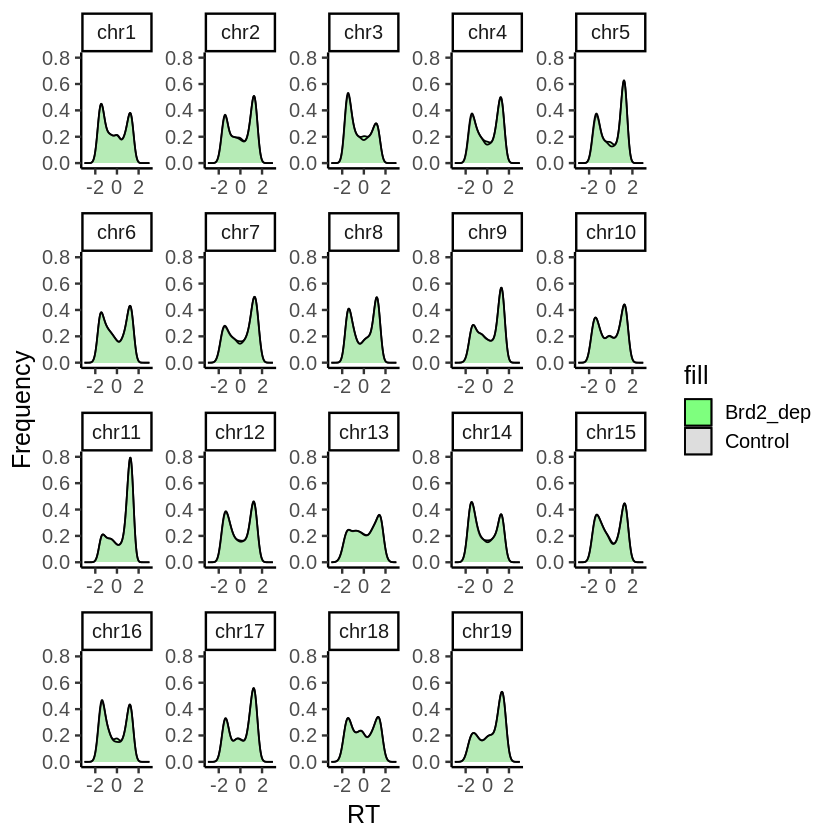

In [5]:
brd2_rt$chr<-factor(brd2_rt$chr, levels=paste0('chr',c(1:19)))

ggplot(brd2_rt, aes(x = dTAG, fill='Brd2_dep')) +
#density
geom_density(alpha=0.3, color='black') +
geom_density(aes(x=DMSO, fill='Control'), alpha=0.3, color='black') +
#per chromosome or genome-wide
facet_wrap(~ chr, scales = "free") + #COMMENT THIS LINE FOR GENOME WIDE
#size
xlim(c(-3,3)) + 
ylim(c(0,0.8)) +
#adjustments
labs(x = "RT", y = "Frequency") + 
scale_fill_manual(values = c('green','grey')) +
theme_classic(base_size = 15) + theme(legend.position = 'right')

### Scatter

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


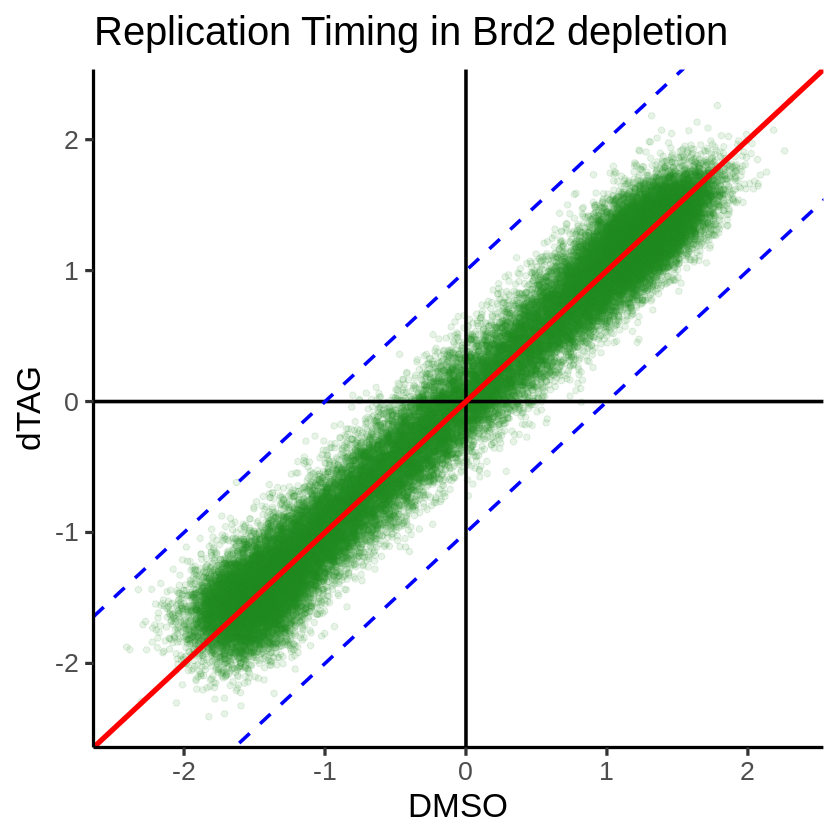

In [6]:
ggplot(na.omit(brd2_rt),aes(x=DMSO,y=dTAG)) + 
geom_point(alpha=0.1, color='forestgreen') + 
theme_classic(base_size = 20) +
#reference lines
geom_hline(color='black',yintercept = 0, size=1) +  geom_vline(color='black',xintercept = 0, size=1) +
geom_abline(color='red',size=1.5) + geom_abline(color='blue',size=1, intercept = 1, linetype=2) +
geom_abline(color='blue',size=1, intercept = -1, linetype=2) +
#title
ggtitle('Replication Timing in Brd2 depletion')

### Browser/ tracks

[1] 0.004914006


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“k-d tree limited by memory. ncmax= 2373”


[1] 0.004914006


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“k-d tree limited by memory. ncmax= 2373”
Warning message:
“Removed 64 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 64 rows containing missing values (`geom_line()`).”


[1] 0.004914006


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“k-d tree limited by memory. ncmax= 2373”
Warning message:
“Removed 64 rows containing missing values (`geom_line()`).”


[1] 0.004914006


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“k-d tree limited by memory. ncmax= 2373”
Warning message:
“Removed 64 rows containing missing values (`geom_line()`).”


[1] 0.004914006


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“k-d tree limited by memory. ncmax= 2373”


[1] 0.004914006


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“k-d tree limited by memory. ncmax= 2373”
Warning message:
“Removed 64 rows containing missing values (`geom_line()`).”


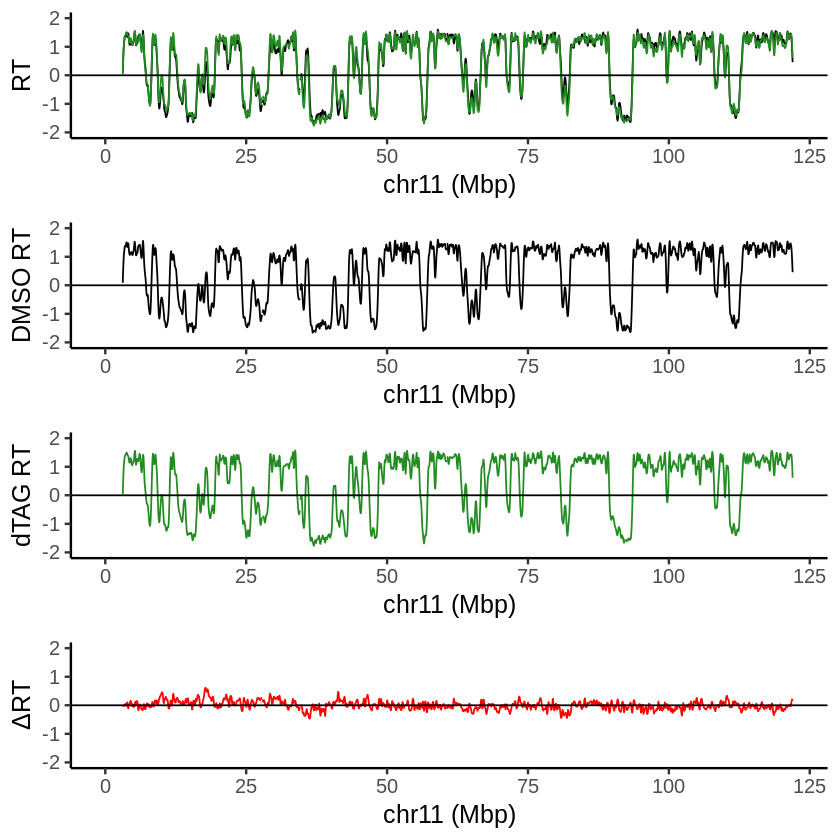

In [7]:
#Can change the next three lines to visualize different chromosomes and adjust scale
chr='chr11'
min=-2
max=2

#viz DMSO and dTAG side-to-side
rt1<-ggplot(brd2_rt[brd2_rt$chr==chr,], aes(x=start/1000000,y=smoothIt(x=start,y=DMSO))) + geom_line(color='black') +
geom_line(aes(x=start/1000000,y=smoothIt(x=start,y=dTAG)), color='forestgreen') +
theme_classic(base_size=15) + geom_hline(yintercept = 0, color='black') + 
xlab(paste(chr,'(Mbp)')) + ylab('RT') + ylim(c(min,max))

#viz DMSO
rt2<- ggplot(brd2_rt[brd2_rt$chr==chr,], aes(x=start/1000000,y=smoothIt(x=start,y=DMSO))) + geom_line(color='black') +
theme_classic(base_size=15) + geom_hline(yintercept = 0, color='black') + 
xlab(paste(chr,'(Mbp)')) + ylab('DMSO RT')  + ylim(c(min,max))

#viz dTAG
rt3<- ggplot(brd2_rt[brd2_rt$chr==chr,], aes(x=start/1000000,y=smoothIt(x=start,y=dTAG))) + geom_line(color='forestgreen') +
theme_classic(base_size=15) + geom_hline(yintercept = 0, color='black') + 
xlab(paste(chr,'(Mbp)')) + ylab('dTAG RT')  + ylim(c(min,max))

#viz RT delta
rt4<-ggplot(brd2_rt[brd2_rt$chr==chr,], aes(x=start/1000000,y=smoothIt(x=start,y=dTAG)-smoothIt(x=start,y=DMSO) )) + geom_line(color='red') +
theme_classic(base_size=15) + geom_hline(yintercept = 0, color='black') + 
xlab(paste(chr,'(Mbp)')) + ylab('ΔRT')  + ylim(c(min,max))

#compare
grid.arrange(rt1,rt2,rt3, rt4, ncol=1)

# A/B Compartments

In [8]:
#read table
all<-read.table(pc, header=TRUE)
head(all)

,chr,start,end,Control_B2,Brd2_dep
,<chr>,<int>,<int>,<dbl>,<dbl>
1,chr1,3000000,3100000,-0.80781,-1.521085
2,chr1,3100000,3200000,-0.79415,-0.896915
3,chr1,3200000,3300000,-0.15090,-1.269885
4,chr1,3300000,3400000,-0.53748,-0.986915
5,chr1,3400000,3500000,0.13277,-0.610020
6,chr1,3500000,3600000,-0.64170,-0.823840


### Density

Warning message:
“Removed 136 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 238 rows containing non-finite values (`stat_density()`).”


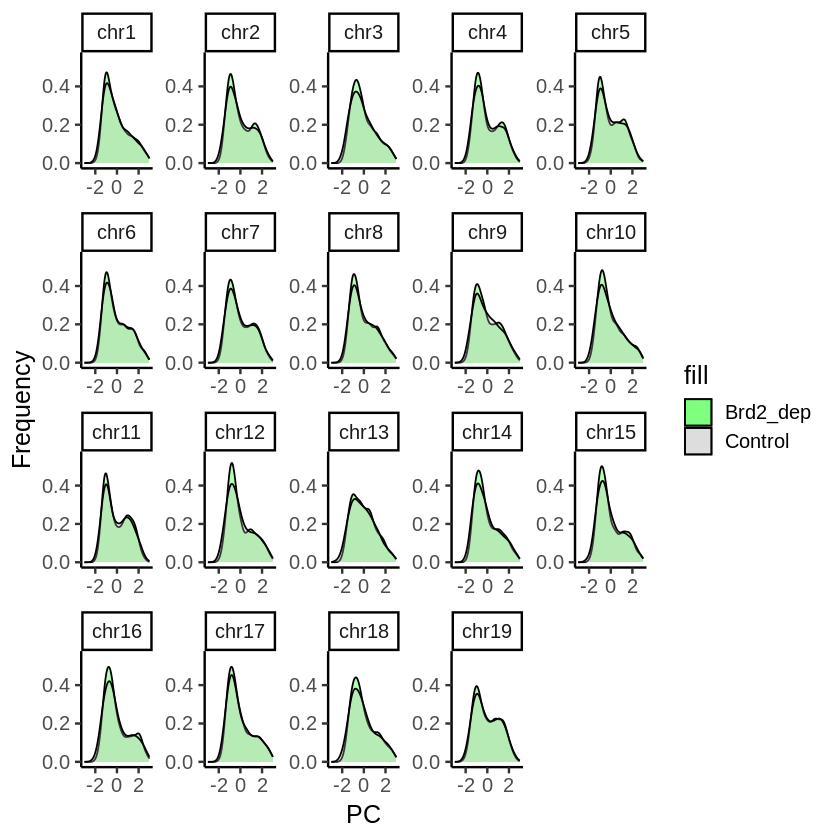

In [9]:
#chromosomes should be in order
all$chr<-factor(all$chr,levels=paste0('chr',c(1:19)))

ggplot(all, aes(x = Brd2_dep, fill='Brd2_dep')) +
#density
geom_density(alpha=0.3, color='black') +
geom_density(aes(x=Control_B2, fill='Control'), alpha=0.3, color='black') +
#genome-wide or chromosome-wise
facet_wrap(~ chr, scales = "free") + # COMMENT THIS LINE TO OBTAIN GENOME_WIDE
#colors
scale_fill_manual(values = c('green','grey')) + 
#sizes
xlim(-3,3) + ylim(c(0,0.55)) +
theme_classic(base_size = 15) + 
#labs and title
labs(x = "PC", y = "Frequency") +
theme(legend.position = 'right')

### Scatter

Warning message:
“Removed 13 rows containing missing values (`geom_point()`).”


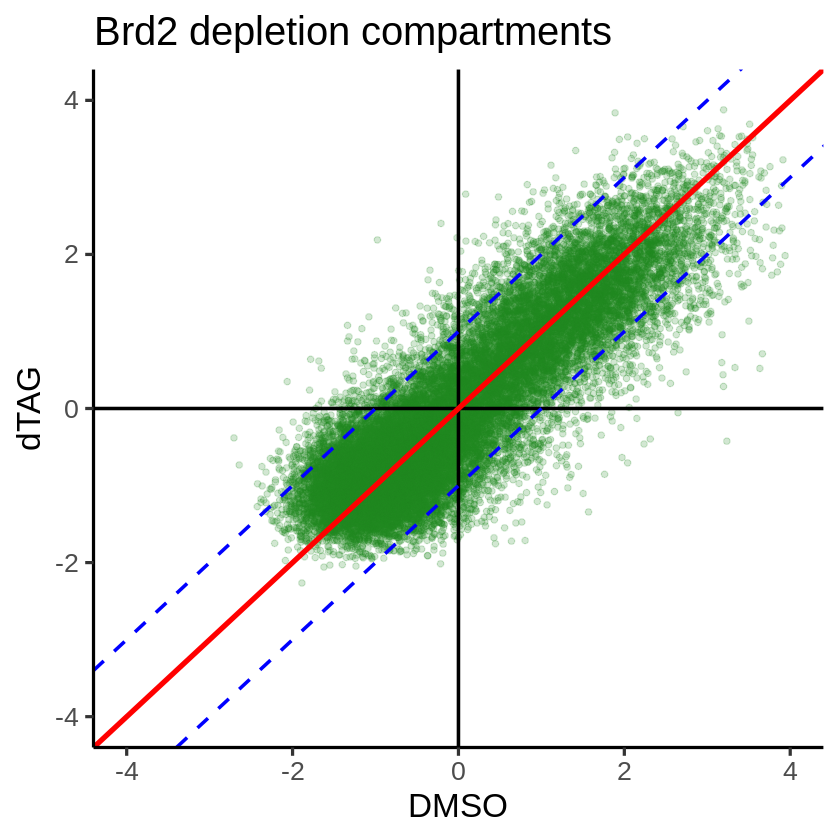

In [10]:
ggplot(all, aes(x=Control_B2,y=Brd2_dep)) + 
geom_point(alpha=0.2, color='forestgreen') + 
theme_classic(base_size = 20) +
#reference line
geom_hline(color='black',yintercept = 0, size=1) +  
geom_vline(color='black',xintercept = 0, size=1) +
geom_abline(color='red',size=1.5) + 
geom_abline(color='blue',size=1, intercept = 1, linetype=2) +
geom_abline(color='blue',size=1, intercept = -1, linetype=2) + 
#labs and title
ggtitle('Brd2 depletion compartments') +
ylab('dTAG')+ xlab('DMSO') + 
#make symmetric
xlim(c(-4,4)) + 
ylim(c(-4,4))

### LaminB correlation

Used to verify that the chosen eigenvectors capture compartmentalization

[1] "chr1"
[1] -0.8624969
[1] "chr2"
[1] -0.8372647
[1] "chr3"
[1] -0.8033664
[1] "chr4"
[1] -0.855596
[1] "chr5"
[1] -0.8738323
[1] "chr6"
[1] -0.8713948
[1] "chr7"
[1] -0.8500454
[1] "chr8"
[1] -0.8705954
[1] "chr9"
[1] -0.8246334
[1] "chr10"
[1] -0.8208496
[1] "chr11"
[1] -0.8306184
[1] "chr12"
[1] -0.7161715
[1] "chr13"
[1] -0.7269039
[1] "chr14"
[1] -0.7858178
[1] "chr15"
[1] -0.8554728
[1] "chr16"
[1] -0.8405529
[1] "chr17"
[1] -0.8015138
[1] "chr18"
[1] -0.8137288
[1] "chr19"
[1] -0.8951249


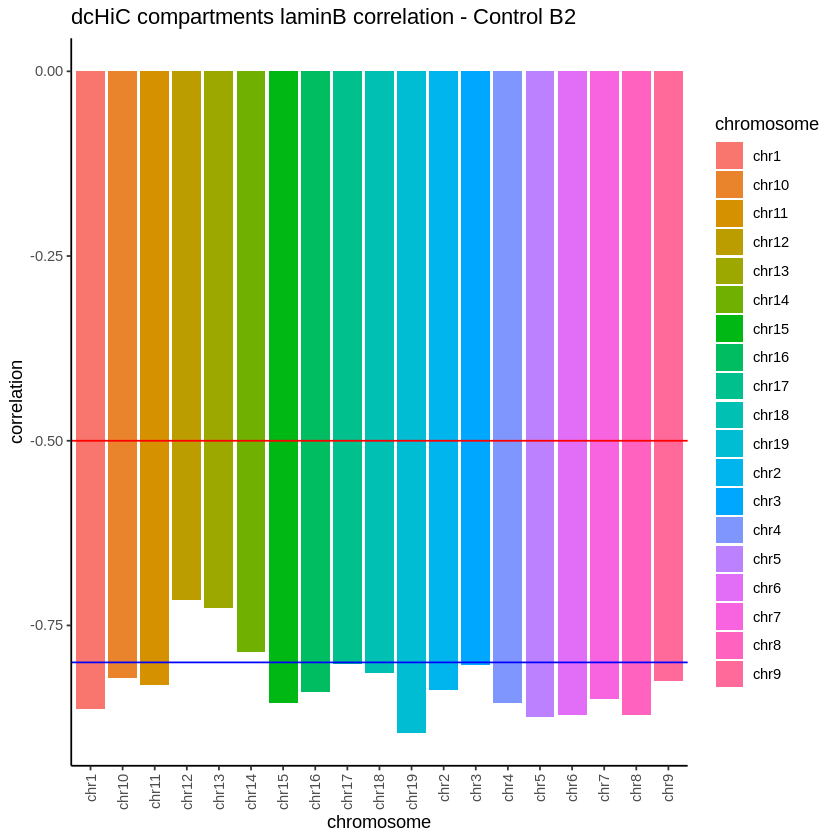

In [11]:
laminB<-read.table(laminB)
names(laminB)<- c('chr','start','end','val')

cors<-c()
chrs<-c()

for (c in paste0('chr',c(1:19))) {
    print(c)
    tmp <- merge(all[all$chr==c,c('start','Brd2_dep')], laminB[laminB$chr==c,c('start','val')], by='start')
    cors<-c(cors,print(cor(tmp$Brd2_dep, tmp$val)))
    chrs<-c(chrs,c)
}

compare<-data.frame(correlation=cors,chromosome=chrs)

ggplot(compare, aes(x=chromosome,y=correlation, fill=chromosome),color='black') + geom_bar(stat='identity') +
geom_hline(color='red', yintercept = -0.5) + 
geom_hline(color='blue', yintercept = -0.8)+ 
ggtitle('dcHiC compartments laminB correlation - Control B2') + theme_classic() + ylab('correlation') +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

### Browser / tracks

In [12]:
chrom='chr11' #CHANGE CHROMOSOME HERE
max=3 #2 for chr11, 3 for chr17

#visualize depletion (dTAG)
p1<-ggplot(all[all$chr==chrom,], aes(x=start/1000000,y=smoothIt(y=Brd2_dep, x=start,lspan=1200000))) + geom_line(color='forestgreen') +
geom_hline(color='black', yintercept = 0) + theme_classic() +ylim(-2,max) +xlab(paste0(chrom,'(Mbp)')) +ylab('PC')

#visualize control (DMSO)
p2<-ggplot(all[all$chr==chrom,], aes(x=start/1000000,y=smoothIt(y=Control_B2, x=start,lspan=1200000))) + geom_line(color='black') +
geom_hline(color='black', yintercept = 0) + theme_classic() +ylim(-2,max) +xlab(paste0(chrom,'(Mbp)')) +ylab('PC')

#visualize DMSO and dTAG simultaneously
p3<-ggplot(all[all$chr==chrom,], aes(x=start/1000000,y=smoothIt(y=Control_B2,x=start,lspan=1200000))) + geom_line(color='black') +
geom_line(aes(x=start/1000000,y=smoothIt(y=Brd2_dep, x=start,lspan=1200000)), color='forestgreen') +
geom_hline(color='black', yintercept = 0) + theme_classic() +ylim(-2,max) +xlab(paste0(chrom,'(Mbp)')) +ylab('PC')

#can also visualize lamin B signal
p4<-ggplot(laminB[laminB$chr==chrom,], aes(x=start/1000000,y=-val)) + geom_line(color='red') +
geom_hline(color='black', yintercept = 0) + theme_classic() +xlab(paste0(chrom,'(Mbp)')) +ylab('- signal')

#delta
p5<-ggplot(all[all$chr==chrom,], aes(x=start/1000000,y=smoothIt(y=Brd2_dep, x=start,lspan=1200000)-smoothIt(y=Control_B2,x=start,lspan=1200000))) + geom_line(color='red') +
geom_hline(color='black', yintercept = 0) + theme_classic() +ylim(-2,max) +xlab(paste0(chrom,'(Mbp)')) +ylab('ΔPC')

[1] 0.009835862


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“k-d tree limited by memory. ncmax= 1189”


[1] 0.009835862


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“k-d tree limited by memory. ncmax= 1189”


[1] 0.009835862


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“k-d tree limited by memory. ncmax= 1189”


[1] 0.009835862


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“k-d tree limited by memory. ncmax= 1189”


[1] 0.009835862


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“k-d tree limited by memory. ncmax= 1189”


[1] 0.009835862


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“k-d tree limited by memory. ncmax= 1189”


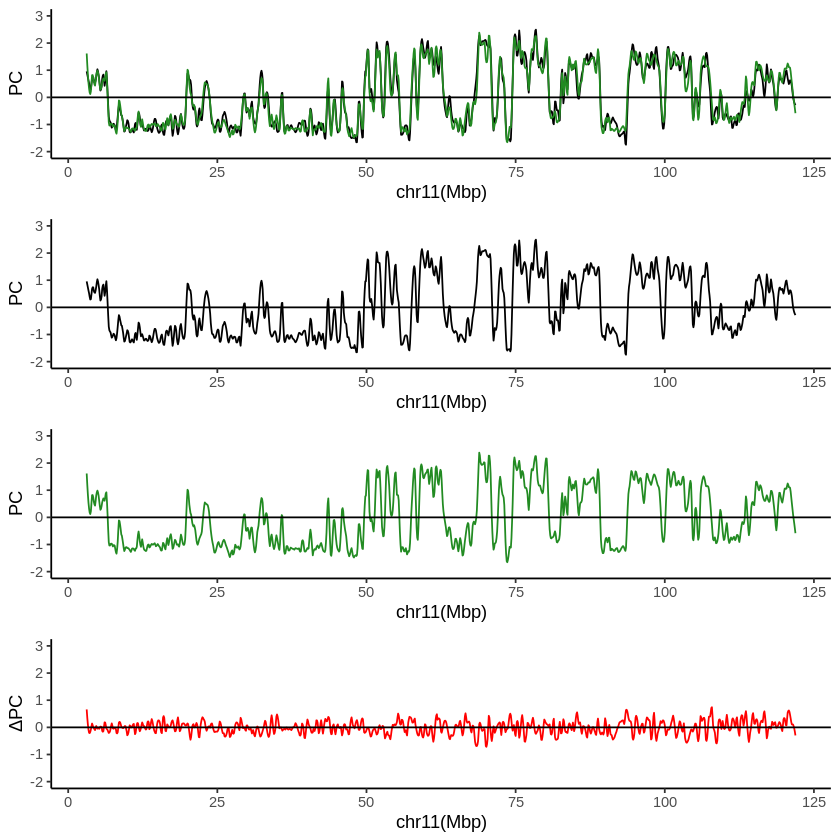

In [13]:
#combine to compare
grid.arrange(p3, p2,p1,p5,ncol=1)

## Session Info

In [14]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.6 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /mnt/BioHome/lhinojosa/software/miniconda3/envs/hestia/lib/libopenblasp-r0.3.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] gridExtra_2.3 ggplot2_3.4.3

loaded via a namespace (and not attached):
 [1] pillar_1.9.0     compiler_4.2.0   base64enc_0.1-3  tools_4.2.0     
 [5] digest_0.6.33    uuid_1.1-0       jsonlite_1.8.7   evaluate_0.21   
 [9] lifecycle_1.0.3  tibble_3.2.1     gtable_0.3